In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import load_diabetes, load_boston
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

In [6]:
alphas = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001, 0.000003, 0.000001]

In [7]:
train_scores = []
test_scores = []
# for each alpha check algorithm performance on both training and test sets
for alpha in alphas:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    test_scores.append(lasso.score(X_test, y_test))    
    train_scores.append(lasso.score(X_train, y_train))

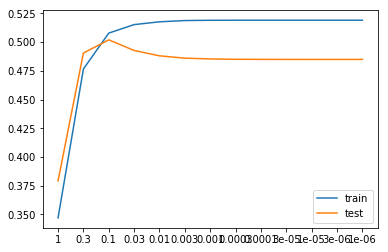

In [8]:
# plot performance depending on alpha
plt.figure()
plt.plot([str(a) for a in alphas], train_scores, label="train")
plt.plot([str(a) for a in alphas], test_scores, label="test")
plt.legend()
plt.show()

In [9]:
train_scores = []
test_scores = []
# for each alpha check algorithm performance on both training and test sets
for alpha in alphas:
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    test_scores.append(ridge.score(X_test, y_test))    
    train_scores.append(ridge.score(X_train, y_train))

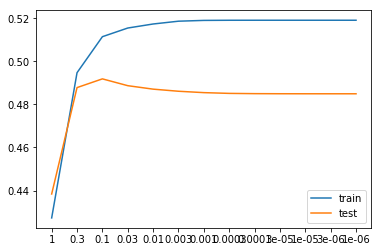

In [10]:
# plot performance depending on alpha
plt.figure()
plt.plot([str(a) for a in alphas], train_scores, label="train")
plt.plot([str(a) for a in alphas], test_scores, label="test")
plt.legend()
plt.show()

In [11]:
polynomial = PolynomialFeatures(degree=4)
X_train_poly = polynomial.fit_transform(X_train)

In [12]:
X_test_poly = polynomial.transform(X_test)

In [13]:
# %%timeit
lasso = Lasso(0.003)
lasso.fit(X_train_poly, y_train)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
# %%timeit
ridge = Ridge(0.003)
ridge.fit(X_train_poly, y_train)

Ridge(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
class Ridge_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, lamda=1, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose
        self.lamda = lamda
        
    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= X @ w.T + b
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, w, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        m = h.shape[0]
        err = h - y
        J_res = (err.T @ err + self.lamda * self.regularization(w)) / (2 * m)
        # END_CODE 

        return J_res
        
    
    def regularization(self, w):
        """
        :param w - ndarray of shape (1, n), n - number of features
        :return regularization penalty for given weights
        """
        return self.lamda * w @ w.T
    
    def regularization_derivative(self, w):
        """
        :param w - ndarray of shape (1, n), n - number of features
        :return dw - ndarray of shape(1, n) - regularization part of J derivative
        """
        return self.lamda * w
    
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        err = h_val - y
        m = y.shape[0]
        dJ_b= np.sum(err / m)
        dJ_w= (X.T @ err / m).T + self.regularization_derivative(w) / m
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Insert one step of gradien descent developed in Linear_Regression_4 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b - self.alpha * dJ_b 
            w= w - self.alpha * dJ_w
            params= (b,w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), w, y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        from sklearn.metrics.scorer import r2_score
        return (r2_score(y_test, z))


In [16]:
def run_experiment(degree, alpha, lamda, X, y):
    """
    Runs ridge regression with given hyperparams and shows its performance
    """
    # make polynomial features
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2018)
    # scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # run regression
    try:
        lin_reg = Ridge_Regression(alpha=alpha, verbose=0, eps=1e-8, lamda=lamda)
        lin_reg.fit (X_train_scaled, y_train)
        print("degree={0}, alpha={1}, lamda={2}, R2={3:.2f}".format(degree, alpha, lamda, lin_reg.score(X_test_scaled, y_test)))
        lin_reg.draw_cost_changes()
        return True
#         print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))
    except:
        print("degree={0}, alpha={1}, lamda={2}, DID NOT CONVERGE".format(degree, alpha, lamda))
        return False

In [17]:
import warnings
warnings.filterwarnings('ignore')

degree=1, alpha=0.3, lamda=1, R2=0.77
degree=1, alpha=0.3, lamda=10, R2=0.77
degree=1, alpha=0.3, lamda=100, R2=0.76
degree=1, alpha=0.3, lamda=1000, DID NOT CONVERGE
degree=1, alpha=0.3, lamda=10000, DID NOT CONVERGE
degree=2, alpha=0.3, lamda=1, DID NOT CONVERGE
degree=2, alpha=0.3, lamda=10, DID NOT CONVERGE
degree=2, alpha=0.3, lamda=100, DID NOT CONVERGE
degree=2, alpha=0.3, lamda=1000, DID NOT CONVERGE
degree=2, alpha=0.3, lamda=10000, DID NOT CONVERGE
degree=3, alpha=0.3, lamda=1, DID NOT CONVERGE
degree=3, alpha=0.3, lamda=10, DID NOT CONVERGE
degree=3, alpha=0.3, lamda=100, DID NOT CONVERGE
degree=3, alpha=0.3, lamda=1000, DID NOT CONVERGE
degree=3, alpha=0.3, lamda=10000, DID NOT CONVERGE
degree=1, alpha=0.1, lamda=1, R2=0.77
degree=1, alpha=0.1, lamda=10, R2=0.77
degree=1, alpha=0.1, lamda=100, R2=0.76
degree=1, alpha=0.1, lamda=1000, R2=0.55
degree=1, alpha=0.1, lamda=10000, DID NOT CONVERGE
degree=2, alpha=0.1, lamda=1, DID NOT CONVERGE
degree=2, alpha=0.1, lamda=10, DID N

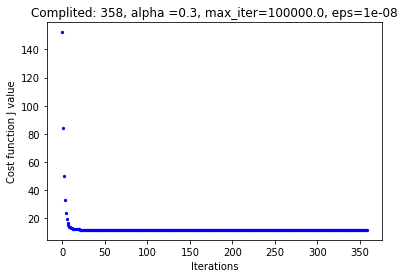

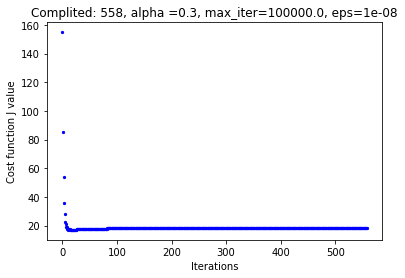

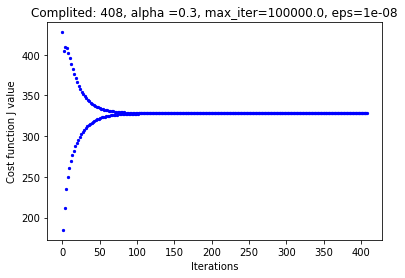

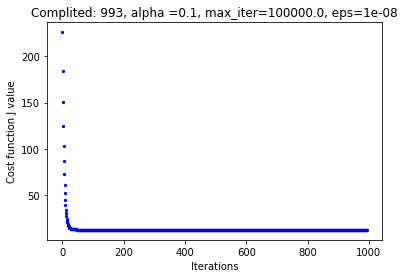

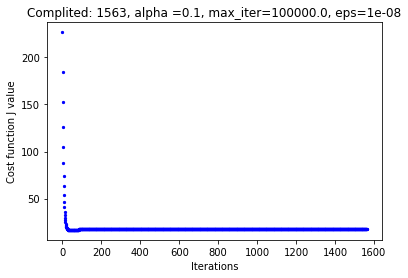

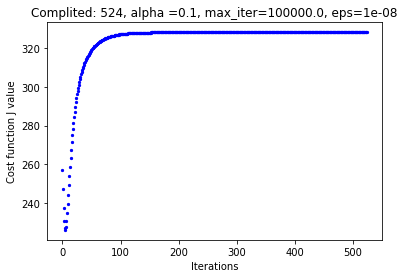

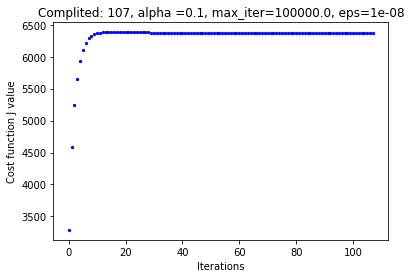

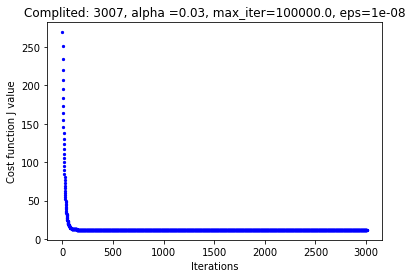

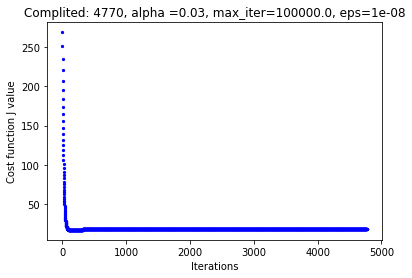

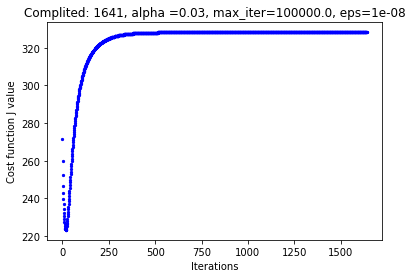

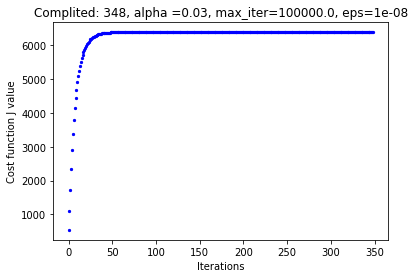

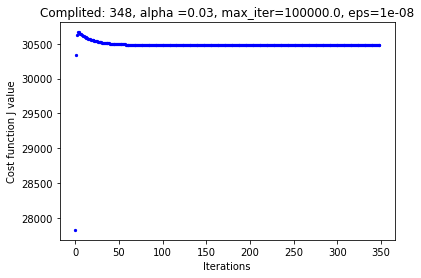

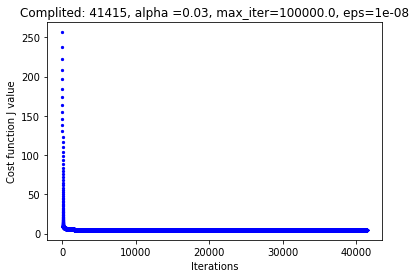

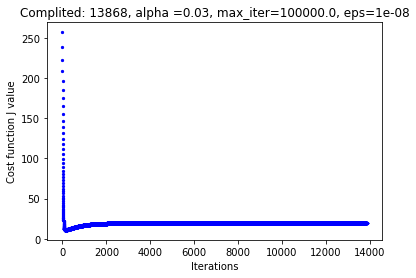

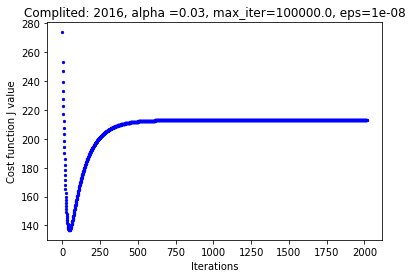

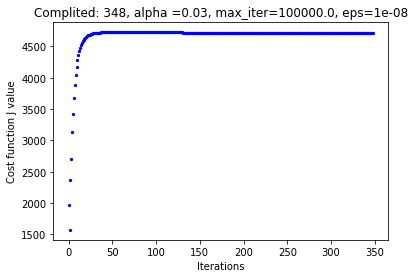

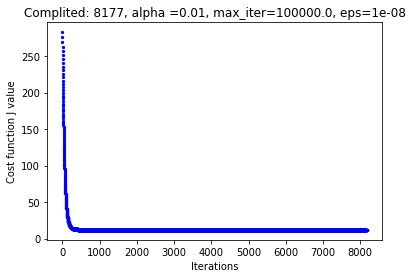

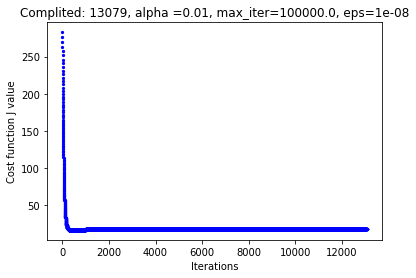

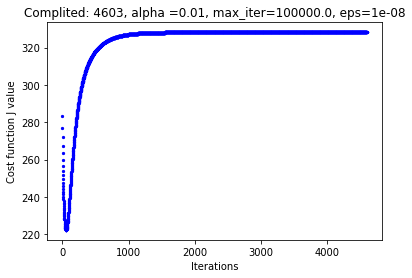

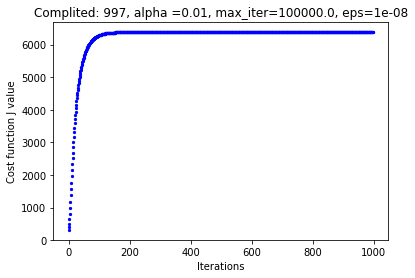

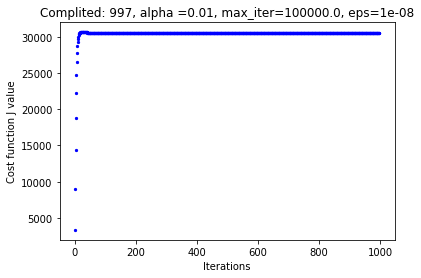

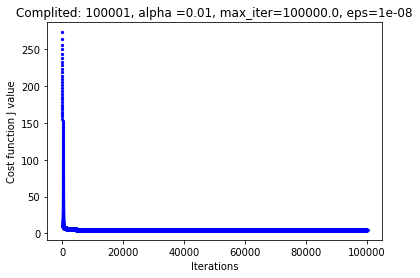

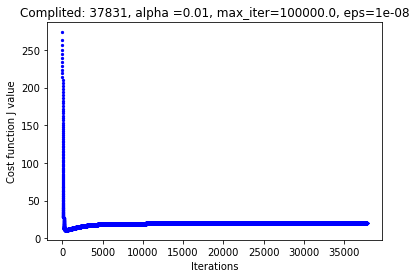

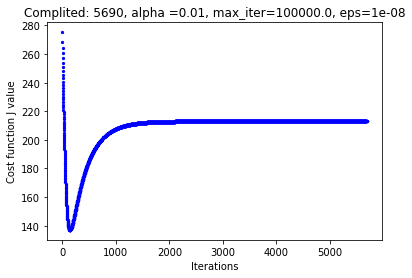

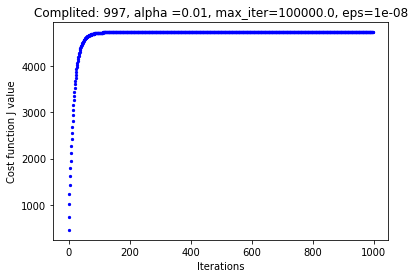

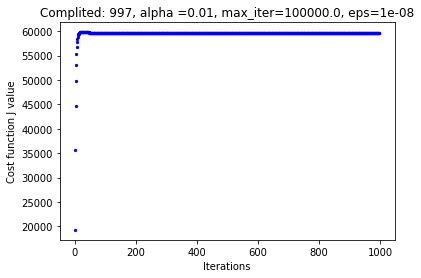

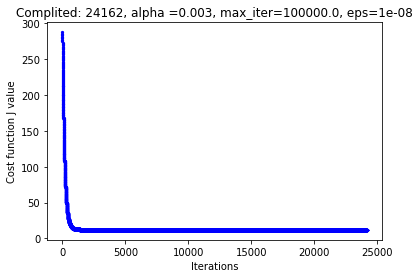

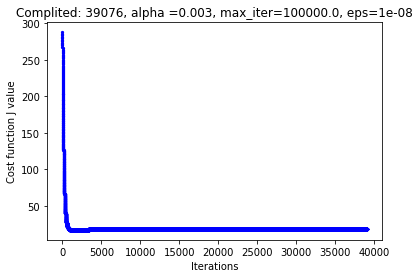

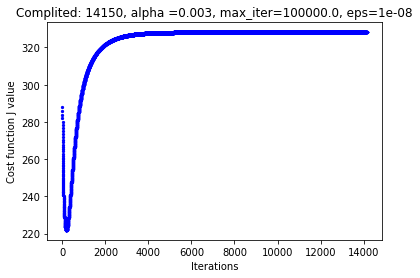

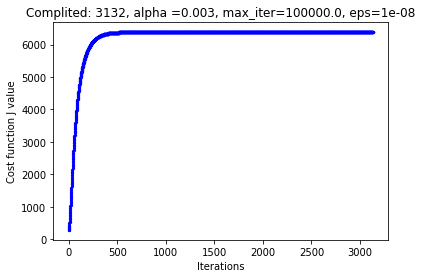

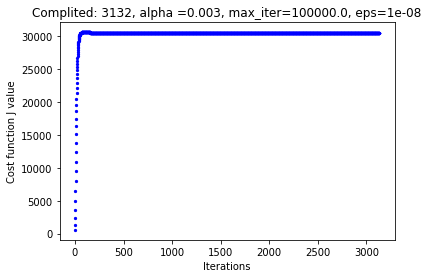

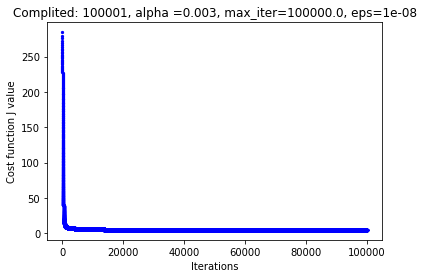

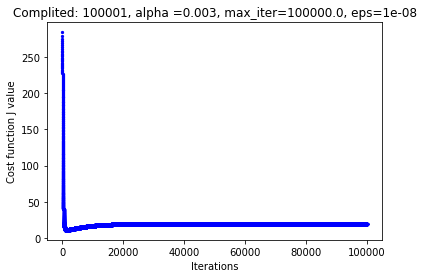

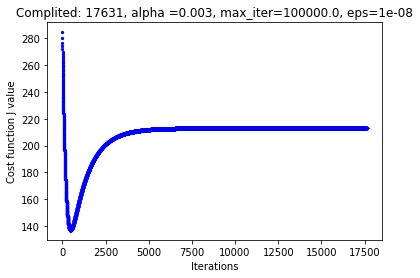

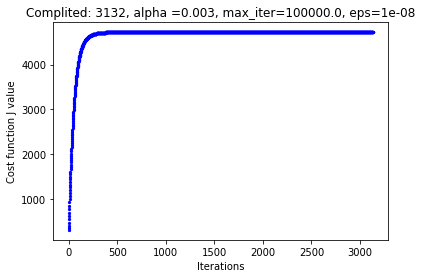

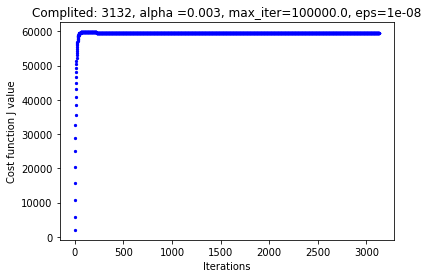

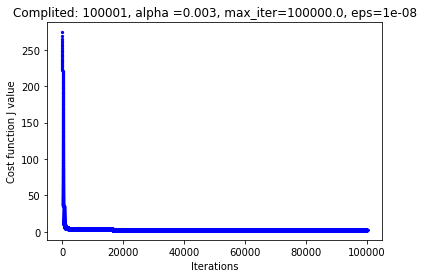

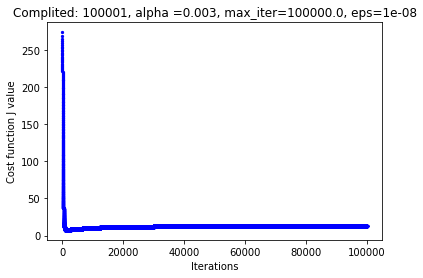

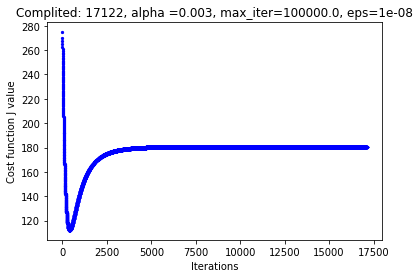

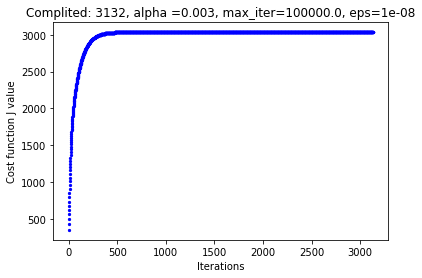

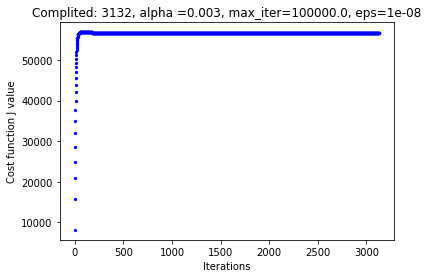

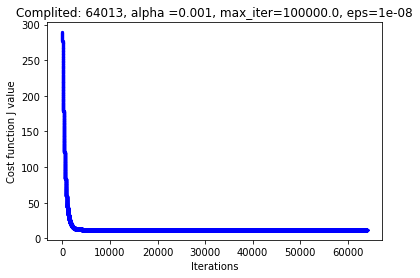

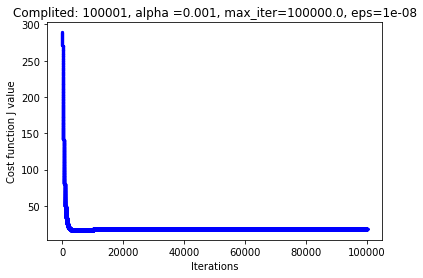

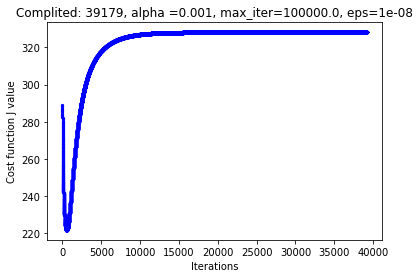

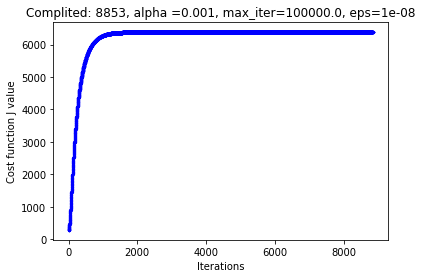

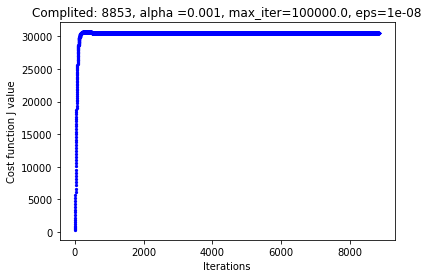

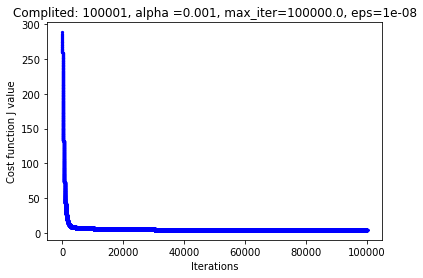

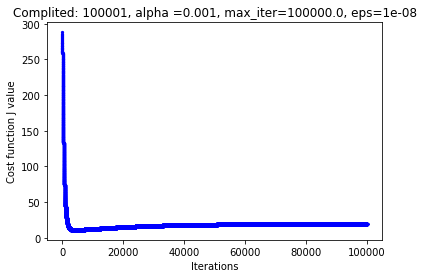

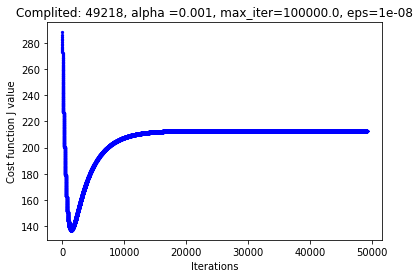

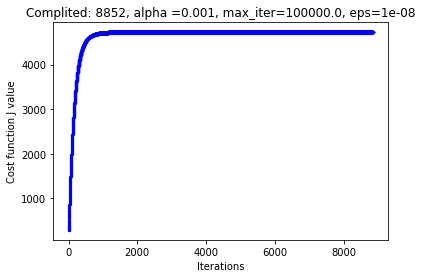

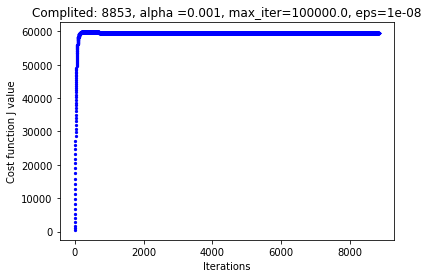

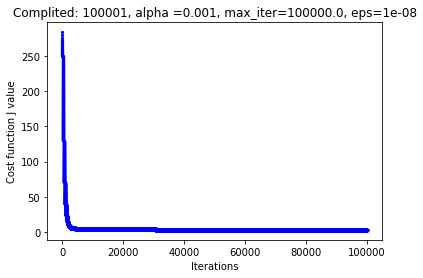

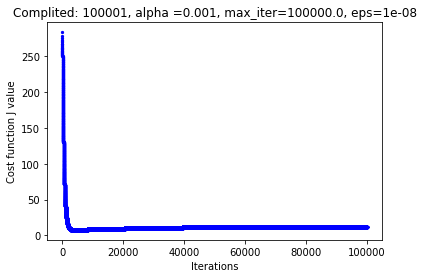

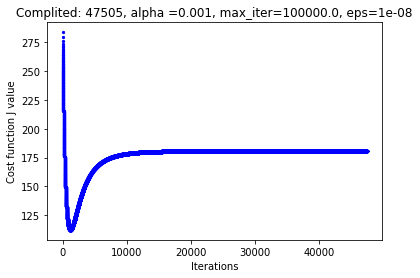

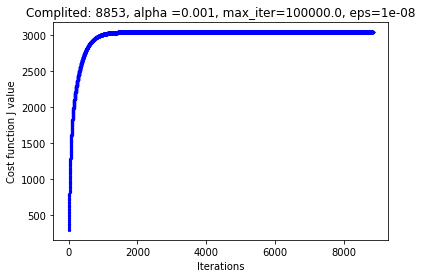

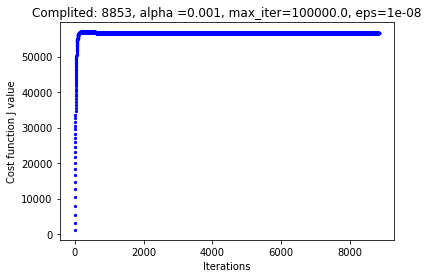

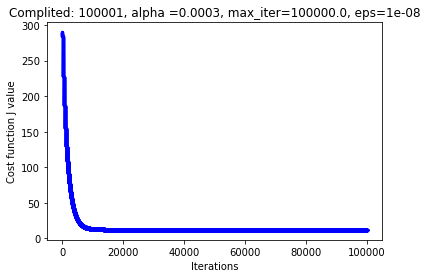

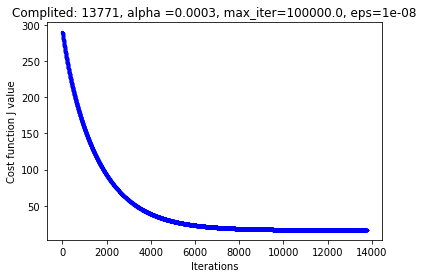

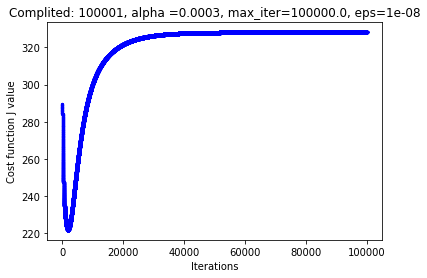

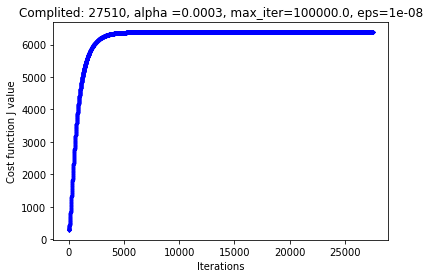

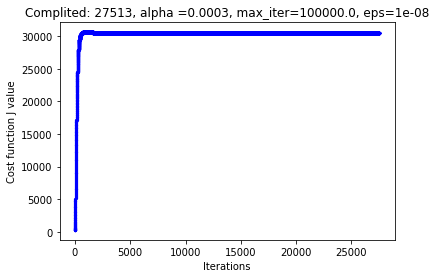

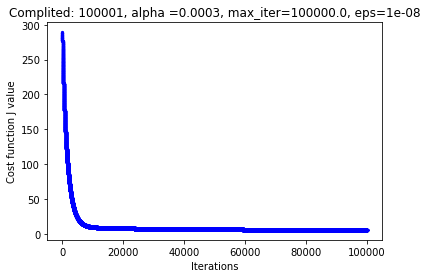

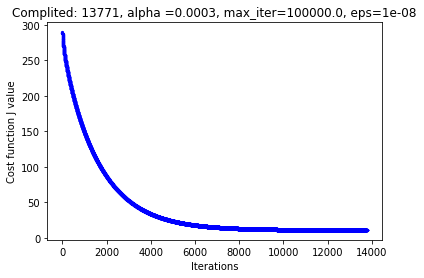

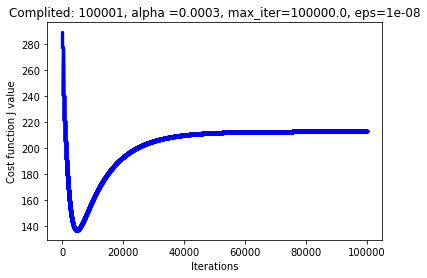

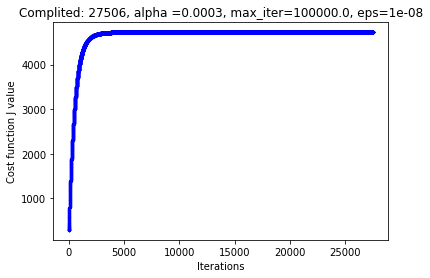

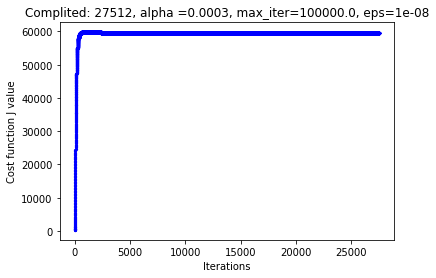

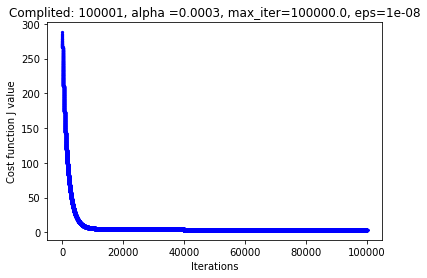

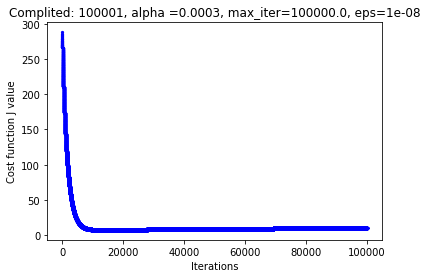

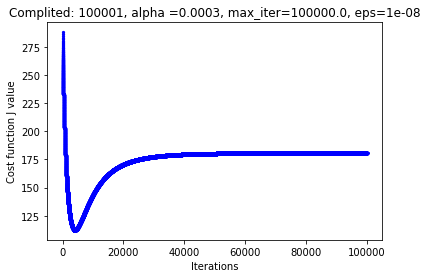

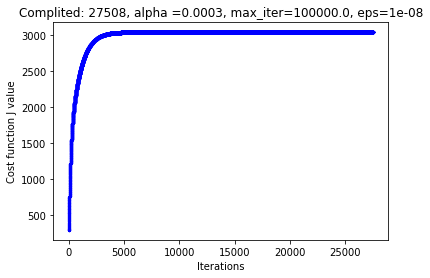

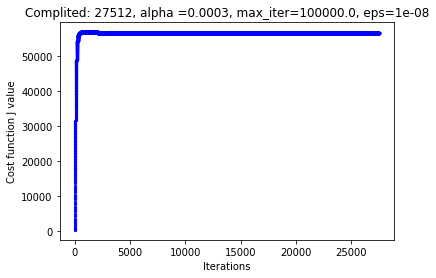

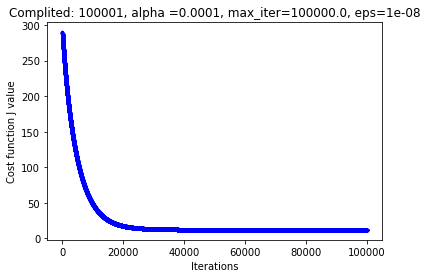

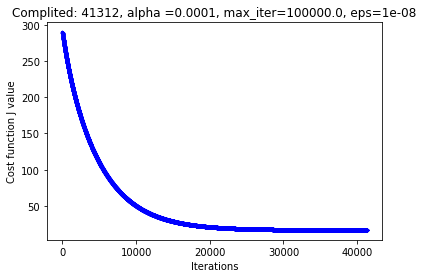

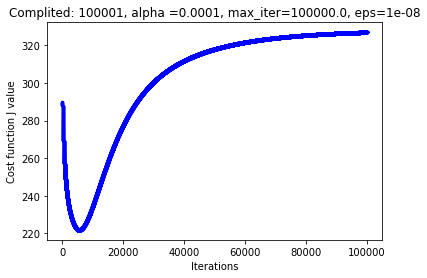

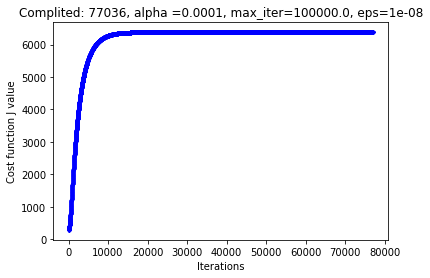

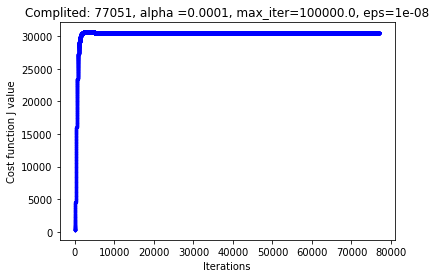

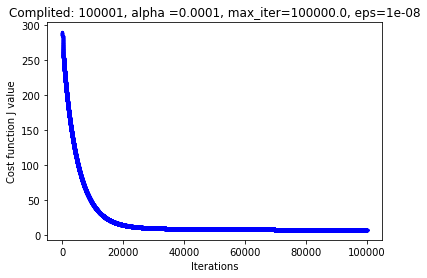

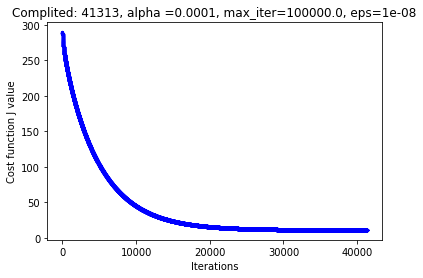

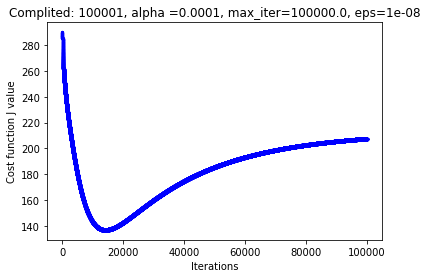

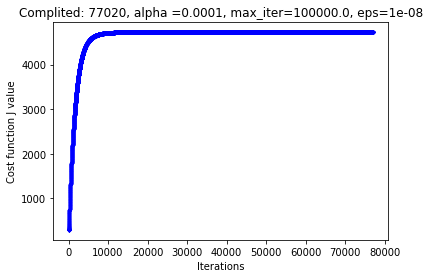

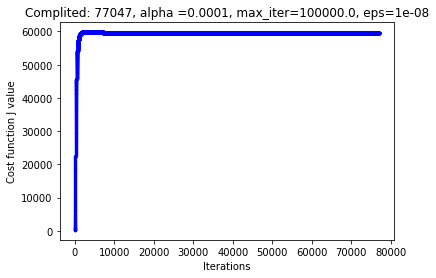

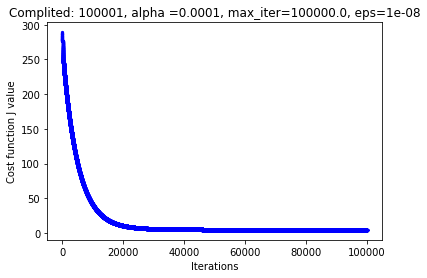

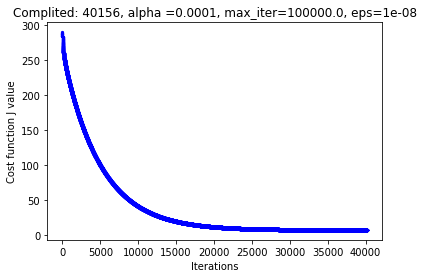

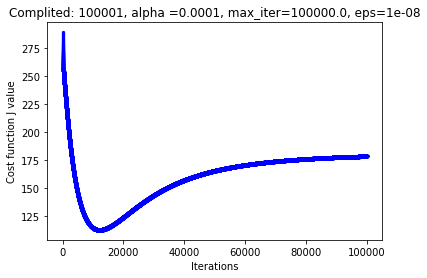

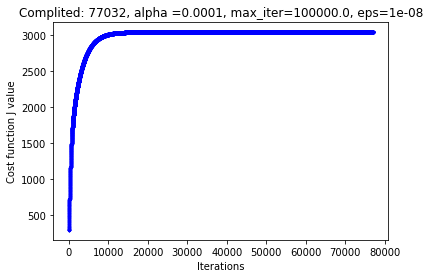

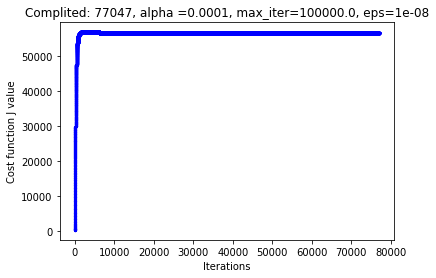

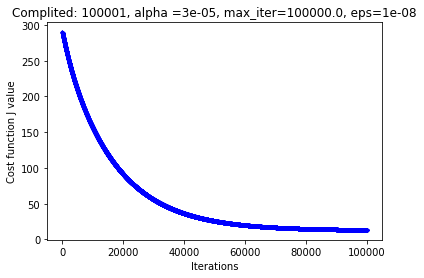

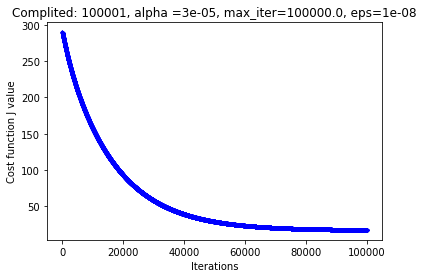

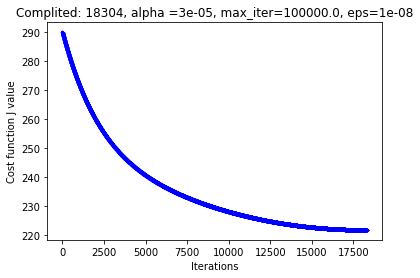

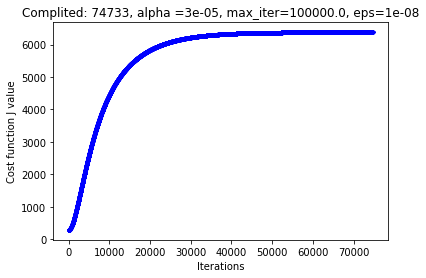

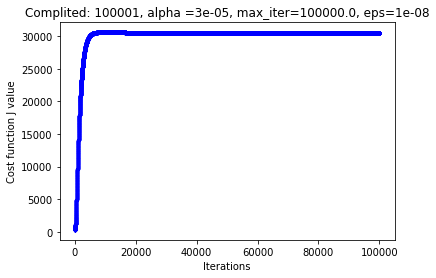

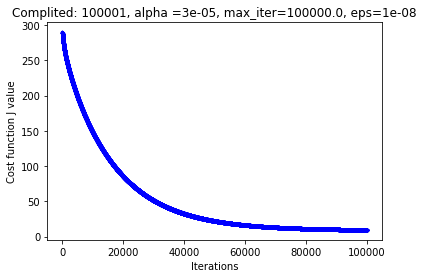

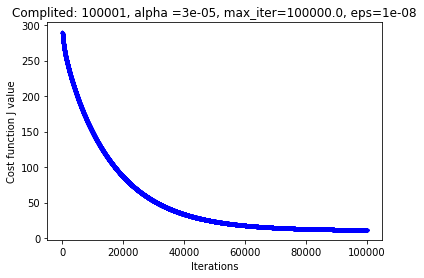

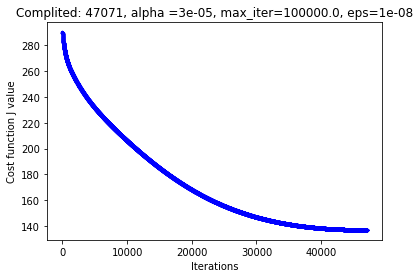

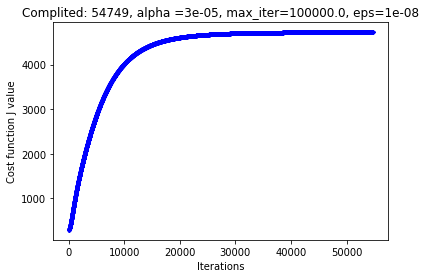

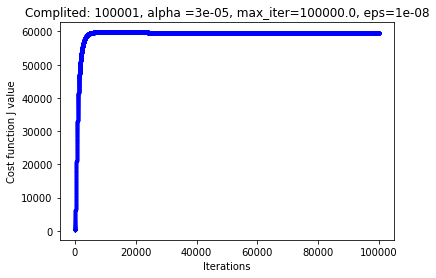

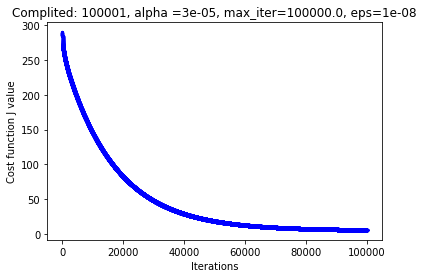

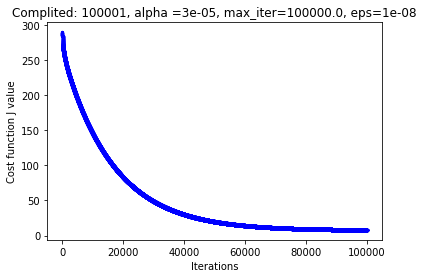

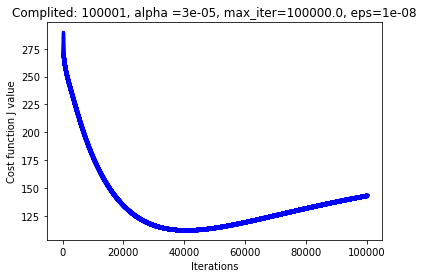

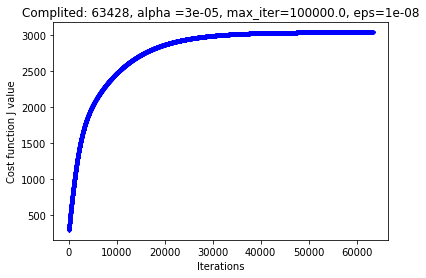

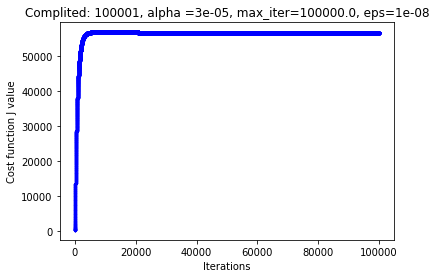

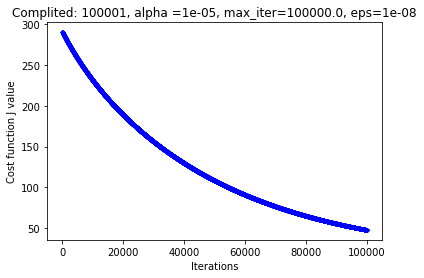

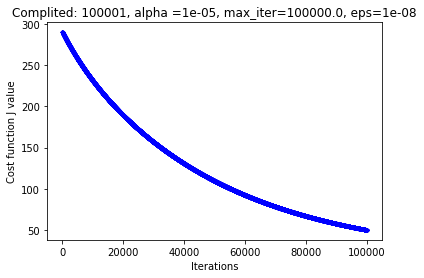

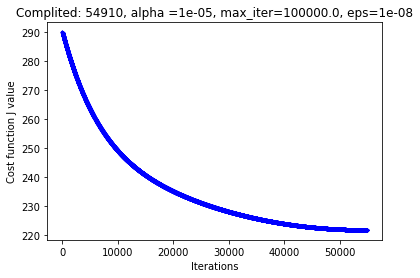

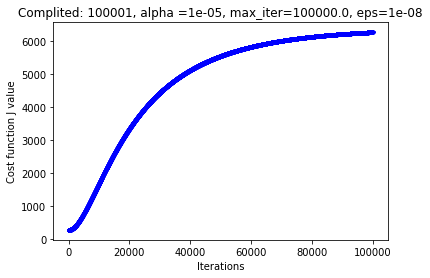

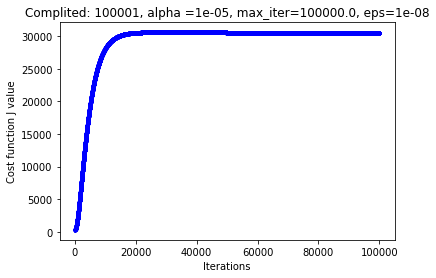

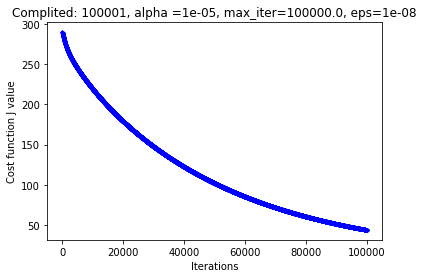

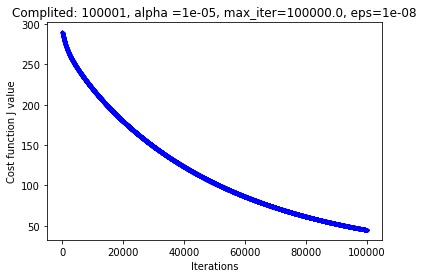

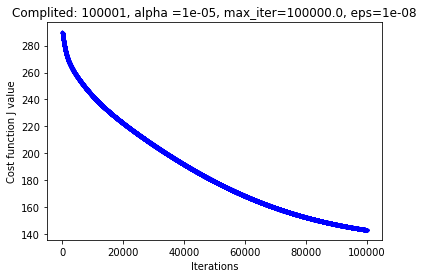

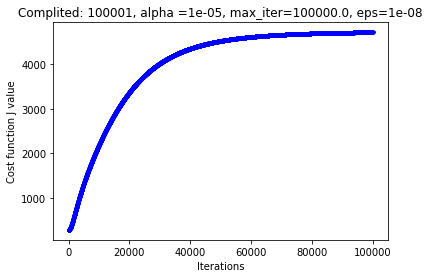

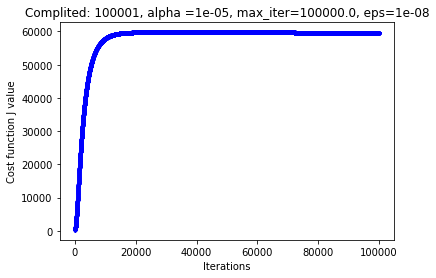

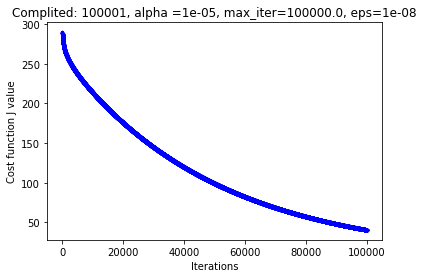

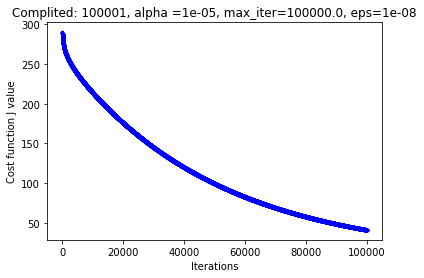

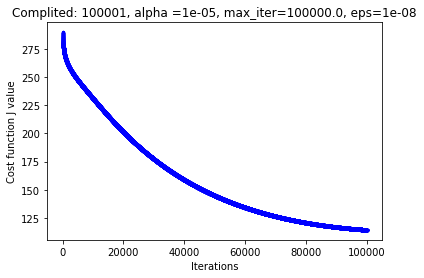

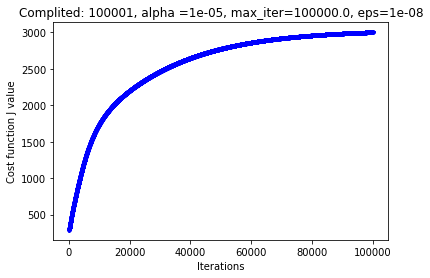

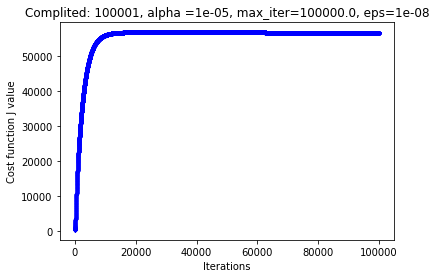

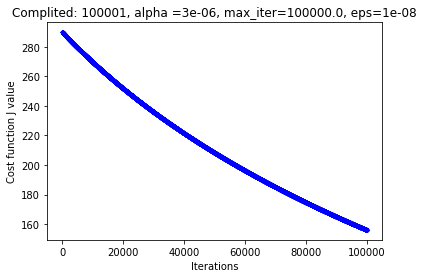

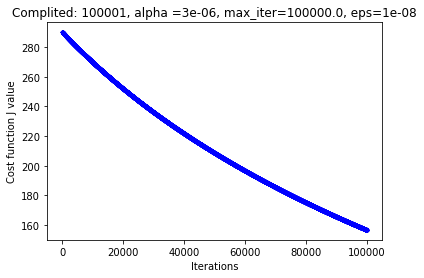

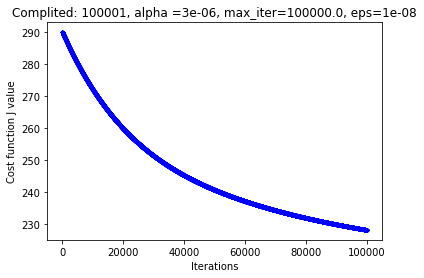

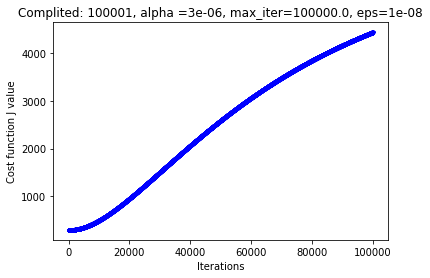

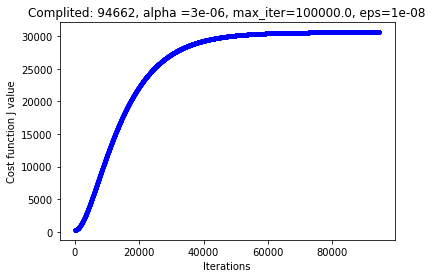

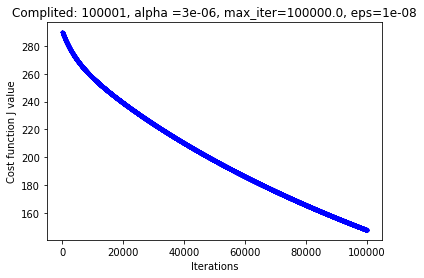

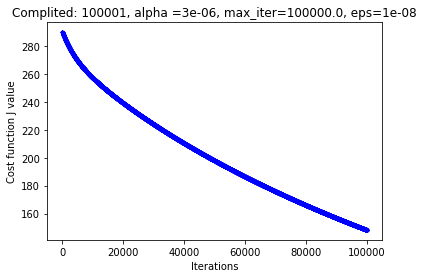

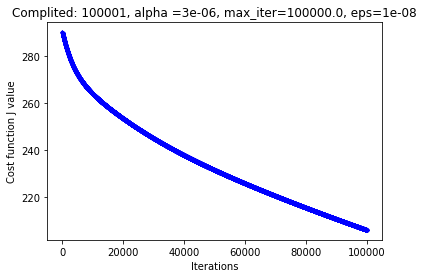

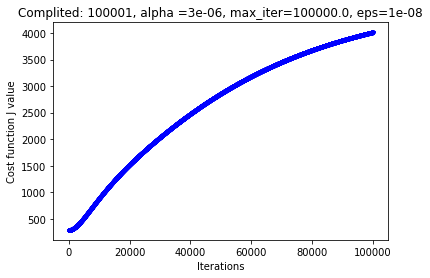

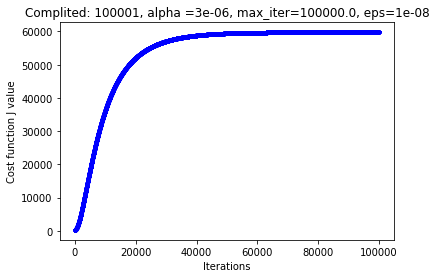

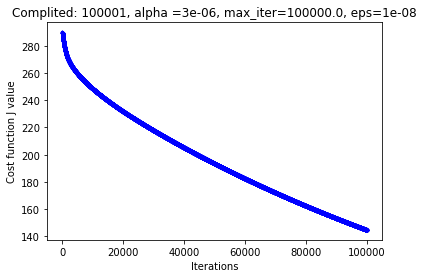

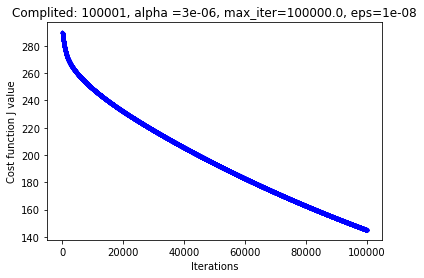

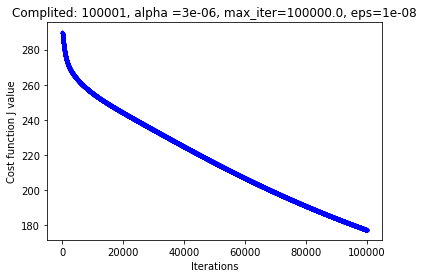

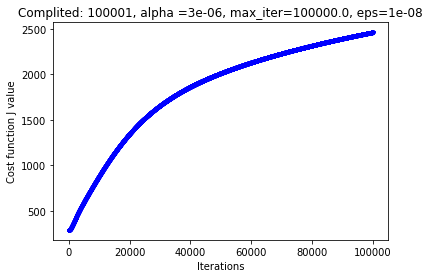

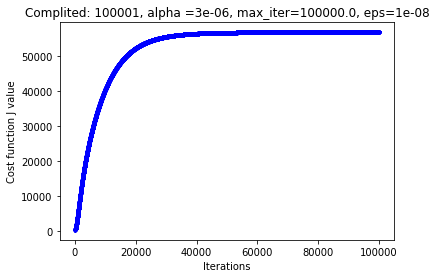

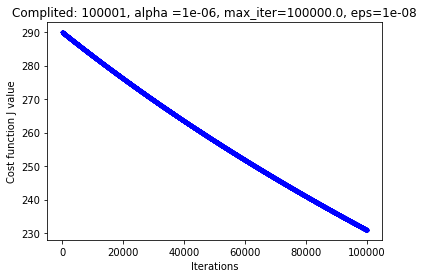

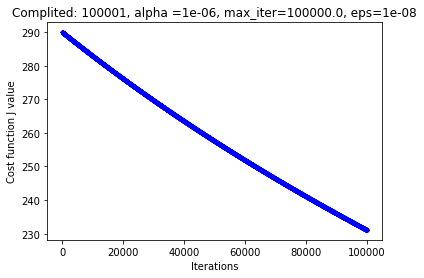

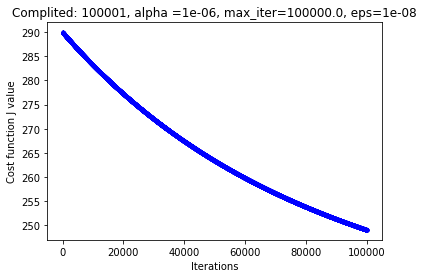

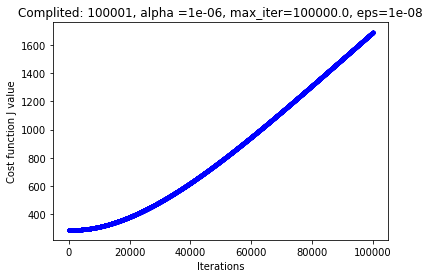

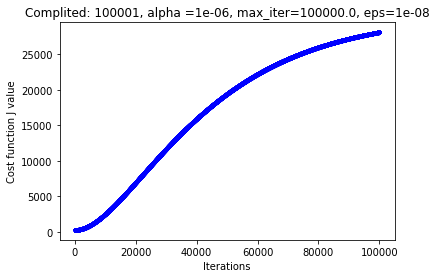

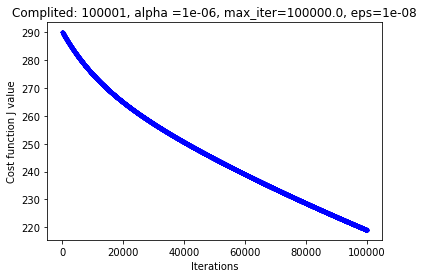

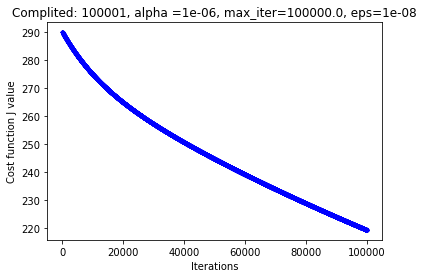

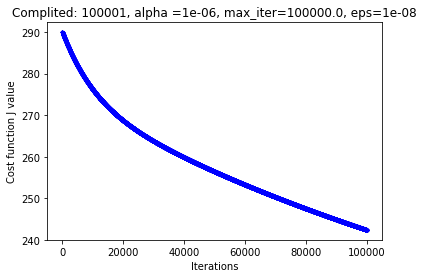

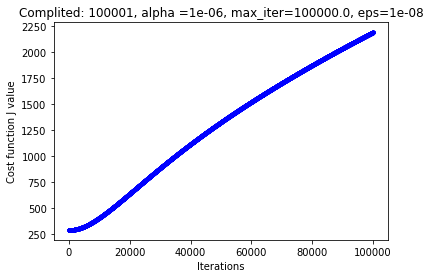

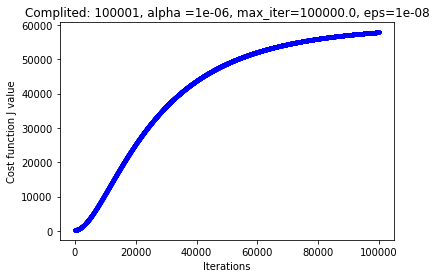

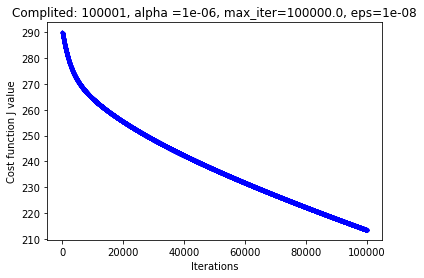

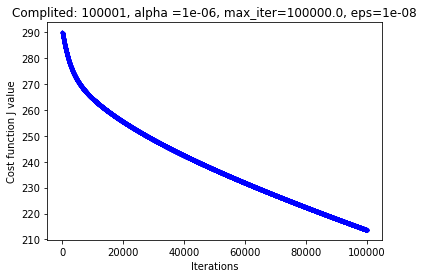

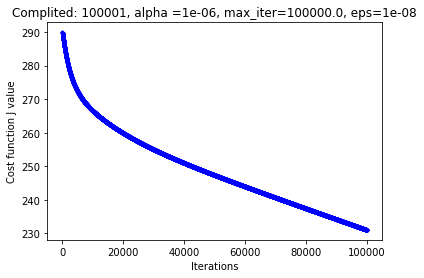

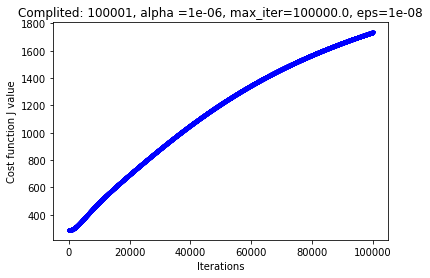

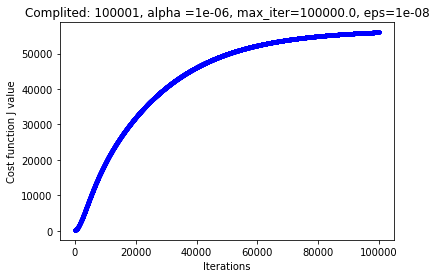

In [18]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
X, y = load_boston(return_X_y = True)
alphas = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001, 0.000003, 0.000001]
lamdas = [10 ** i for i in range(0, 5)]
degrees = range(1, 4)
for alpha in alphas[1:]:
    for degree in degrees:
        for lamda in lamdas:
            converged = run_experiment(degree=degree, alpha=alpha, lamda=lamda, X=X, y=y)
#             if not converged:
#                 break;